In [1]:
import sys
import importlib
import pickle

# data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data analysis
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# pytorch specific
import torch
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm

# project specific
sys.path.append('../')
from src import config
from src.utils import visualisation, benchmark, helpers, monitoring, experiment
from src.models import model


from matplotlib.animation import FuncAnimation
from IPython.display import HTML

pd.options.display.width = 1000
DEVICE = torch.device(config["DEVICE"])

In [64]:
importlib.reload(model)
#with open('../workfiles/BRCA_ds.pkl', 'rb') as f:
data_param = '../workfiles/light_BRCA_ds.pkl'
config = {
    "dropout" : 0.5,
    "latent_dim" : 16,
    "convolution" : True,
    "transformer" : False,
    "num_layers" :  2,
    "n_epoch" : 12
}



config =     {
    'convolution': False, 
    'transformer': False, 
    'dropout': 0.3, 
    'latent_dim': 128, 
    'num_layers': 2, 
    'padding': 1, 
    'kernel_size': 3, 
    'variational': 'VQ-VAE', 
    'commitment_cost': 0.4, 
    'embedding_dim': 128, 
    'num_embeddings': 128}

e = experiment.Experiment(data_param=data_param, model_param=config )


input shape : 3242
(1231, 3242)
(1231, 1, 3242)
train data: 1231


Running the following configuration:
../workfiles/light_BRCA_ds.pkl
{'convolution': False, 'transformer': False, 'dropout': 0.3, 'latent_dim': 128, 'num_layers': 2, 'padding': 1, 'kernel_size': 3, 'variational': 'VQ-VAE', 'commitment_cost': 0.4, 'embedding_dim': 128, 'num_embeddings': 128}


  2%|▏         | 16/1000 [00:19<17:04,  1.04s/it] /Users/aygalic/Thesis/genome_analysis_parkinson/testing/../src/utils/monitoring.py:121: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(encode_out)
  2%|▏         | 19/1000 [00:22<16:10,  1.01it/s]/Users/aygalic/Thesis/genome_analysis_parkinson/testing/../src/utils/monitoring.py:121: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(encode_out)
  6%|▌         | 61/1000 [01:01<12:37,  1.24it/s]/Users/aygalic/Thesis/genome_analysis_parkinson/testing/../src/utils/monitoring.py:121: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(encode_out)
100%|██████████| 1000/1000 [17:01<00:00,  1.02s/it] 


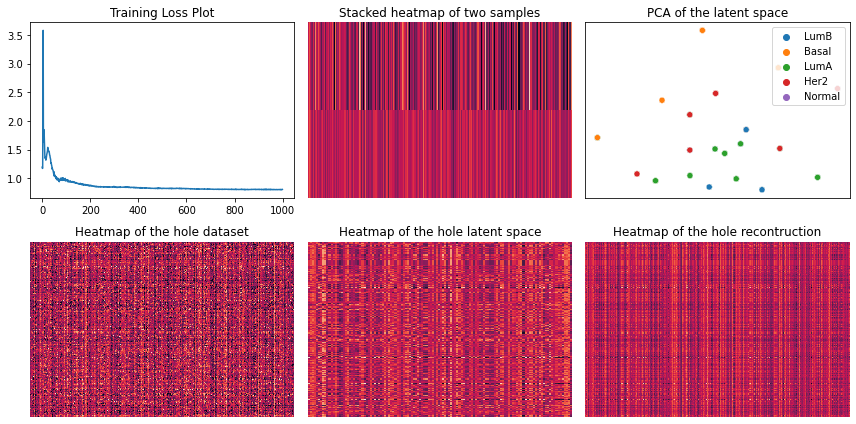

{'hopkins': 0.9999999924513153, 'ari': 0.15500792418449127, 'nmi': 0.25871700123276997, 'silhouette': 0.4753961, 'fm': 0.40308180654932996, 'homogeneity': 0.28121819959832917, 'completeness': 0.23954982717570392, 'v_measure': 0.25871700123277}


In [68]:
e.run()

In [65]:
# let's get a sample a run it layer by layer
x = iter(e.dataloader).__next__()
x.shape

torch.Size([32, 1, 3242])

In [66]:
e.model.encoder(x).shape

torch.Size([32, 1, 128])

In [67]:
e.model(x)

(tensor(0.0085, grad_fn=<AddBackward0>),
 tensor([[[0.5008, 0.5120, 0.5000,  ..., 0.5000, 0.4999, 0.5149]],
 
         [[0.5000, 0.5000, 0.4998,  ..., 0.5000, 0.5089, 0.5180]],
 
         [[0.4997, 0.5000, 0.4994,  ..., 0.5094, 0.4998, 0.5000]],
 
         ...,
 
         [[0.5064, 0.5010, 0.5018,  ..., 0.5111, 0.4995, 0.5000]],
 
         [[0.5043, 0.5000, 0.5000,  ..., 0.5043, 0.5000, 0.5169]],
 
         [[0.4998, 0.5000, 0.5000,  ..., 0.5000, 0.4999, 0.5197]]],
        grad_fn=<SigmoidBackward0>),
 tensor(5.3013),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[[ 0.0042,  0.0012, -0.0025,  ..., -0.0042,  0.0067,  0.0024]],
 
         [[-0.0054, -0.0078,  0.0035,  ...,  0.0072,  0.0069,  0.0011]],
 
         [[ 0.0030, -0.0023, -0.0045,  ..., -0.0030, -0.0048,  0

In [16]:
x_ = x
for layer in e.model.encoder:
    print(layer)
    x_ = layer(x_)
print(x_.shape)

Conv1d(1, 32, kernel_size=(7,), stride=(2,), padding=(3,))
LeakyReLU(negative_slope=0.05)
Dropout(p=0.5, inplace=False)
MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv1d(32, 64, kernel_size=(7,), stride=(2,), padding=(3,))
LeakyReLU(negative_slope=0.05)
Dropout(p=0.5, inplace=False)
MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv1d(64, 128, kernel_size=(7,), stride=(2,), padding=(3,))
LeakyReLU(negative_slope=0.05)
Dropout(p=0.5, inplace=False)
MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv1d(128, 256, kernel_size=(7,), stride=(2,), padding=(3,))
LeakyReLU(negative_slope=0.05)
Dropout(p=0.5, inplace=False)
MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv1d(256, 512, kernel_size=(7,), stride=(2,), padding=(3,))
LeakyReLU(negative_slope=0.05)
Dropout(p=0.5, inplace=False)
MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Flatten(start_di

In [17]:
for layer in e.model.decoder:
    print(layer)
    x_ = layer(x_)
    print(x_.shape)

Linear(in_features=16, out_features=384, bias=True)
torch.Size([32, 384])
Unflatten(dim=1, unflattened_size=(128, 3))
torch.Size([32, 128, 3])
Upsample(scale_factor=2.0, mode='nearest')
torch.Size([32, 128, 6])
ConvTranspose1d(128, 512, kernel_size=(7,), stride=(2,), padding=(3,))
torch.Size([32, 512, 11])
LeakyReLU(negative_slope=0.05)
torch.Size([32, 512, 11])
Dropout(p=0.5, inplace=False)
torch.Size([32, 512, 11])
Upsample(scale_factor=2.0, mode='nearest')
torch.Size([32, 512, 22])
ConvTranspose1d(512, 256, kernel_size=(7,), stride=(2,), padding=(3,))
torch.Size([32, 256, 43])
LeakyReLU(negative_slope=0.05)
torch.Size([32, 256, 43])
Dropout(p=0.5, inplace=False)
torch.Size([32, 256, 43])
Upsample(scale_factor=2.0, mode='nearest')
torch.Size([32, 256, 86])
ConvTranspose1d(256, 128, kernel_size=(7,), stride=(2,), padding=(3,))
torch.Size([32, 128, 171])
LeakyReLU(negative_slope=0.05)
torch.Size([32, 128, 171])
Dropout(p=0.5, inplace=False)
torch.Size([32, 128, 171])
Upsample(scale_fac

In [27]:
x = iter(e.dataloader).__next__()

In [38]:
a = e.model.encode(x)
a